<a href="https://colab.research.google.com/github/iyappan24/Applied-AI-Notebooks/blob/master/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AMAZON FINE FOOD REVIEWS : NAIVE BAYES

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


**DATA SET SPLITS ** 

1. AVG_WORD2VEC : 70K TRAIN,  30K TEST
2. TFIDF_WORD2VEC : 70K TRAIN ,  30K TEST
3. BOW : 60K TRAIN,  20K CV,  20K TEST
4. TFIDF : 60K TRAIN, 20K CV,  20K TEST


## IMPORTING THE LIBRARIES

In [90]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly as py
import plotly.graph_objs  as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.decomposition import TruncatedSVD
import operator
import wordcloud
from PIL import Image
import matplotlib.pyplot as plt

### CONFIGURING PLOTLY


In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### LOADING THE DATA

### FEATURIZATION 1 : BAG OF WORDS

In [0]:
bow_train = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/train_bow.sav','rb'))
bow_cv = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/cv_bow.sav','rb'))
bow_test = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/test_bow.sav','rb'))
y_train = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/y_train.sav','rb'))
y_test = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/y_test.sav','rb'))
y_cv = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/y_cv.sav','rb'))
bow = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/BOW.sav','rb'))

** DEFINING ALPHA RANGES  FOR CROSS VALIDATION **

In [0]:
#getting the alpha in the powers of 2 
range_alpha = np.arange(0,10)
p_2 = []
for i in range_alpha:
  p_2.append(2**i)
  
range_alpha = np.array(p_2)

 ** OBJECTIVE ** 
 
 1. Have model whose ability to is high in predicting the negative reviews in the presence of class imbalance problem
 
 2.  Recall of the Minority class must be high i.e Negative Reviews. We do not want a model that classifes more negative points as positive. We want to minimise that error. 
 
 3. Have a  decent tradeoff between the Recall of the Negative Reviews and overall accuracy of the algorithm to choose the best Alpha because the Priors are already impacted by the imbalance of class present in the dataset.
 
 4. We can remove the bias present in the dataset by balancing the priors making both neagtive and postive priors equally likely.
 
 

In [0]:
#creating dictionaries to score the corresponding values of the metrics
cv_a = {}
cv_r = {}
cv_f1 = {}
cv_Nr = {}
cv_Nf1= {}

 ** RUNNING THE LOOP ** 

In [70]:
#making the algorithm learn the prior probabilities from the training dataset
for i in range_alpha:
  mnb = MultinomialNB(alpha = i,fit_prior =False,class_prior=[0.5,0.5])
  mnb.fit(bow_train,y_train)
  print("Running for Alpha : " + str(i) + "\n")
  c_pred = mnb.predict(bow_cv)
  cv_a[i] = accuracy_score(y_cv,c_pred)
  cv_r[i] = recall_score(y_cv,c_pred,average='weighted')
  cv_f1[i] = f1_score(y_cv,c_pred,average = 'weighted')
  cv_Nr[i] =recall_score(y_cv,c_pred,average='binary',pos_label=0) #getting the recall of the negative reviews label 
  cv_Nf1[i]=f1_score(y_cv,c_pred,average = 'binary',pos_label = 0) #getting the F1_score of the negative reviews label

Running for Alpha : 1

Running for Alpha : 2

Running for Alpha : 4

Running for Alpha : 8

Running for Alpha : 16

Running for Alpha : 32

Running for Alpha : 64

Running for Alpha : 128

Running for Alpha : 256

Running for Alpha : 512



** ANALYSIS ** 

Text(0.5,1,'ACCURACY PLOT \n ')

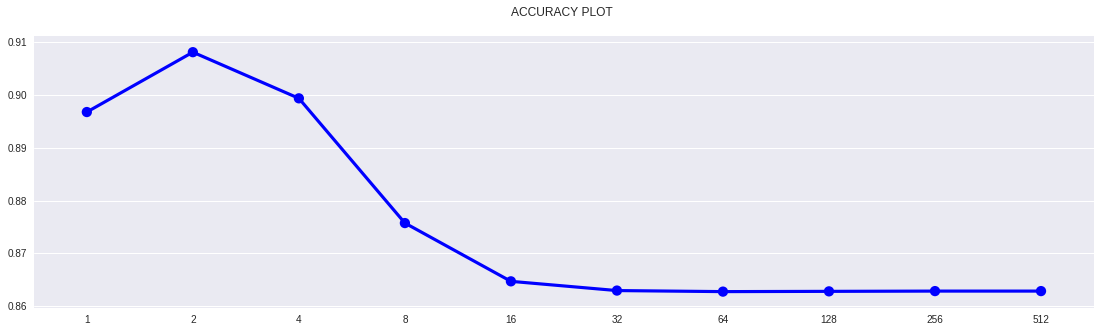

In [71]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_a.keys()),y=list(cv_a.values()),color ='blue').set_title("ACCURACY PLOT \n ")

In [63]:
max(cv_a.items(), key=operator.itemgetter(1))

(2, 0.90815)

**Maximum Accuracy at Alpha = 2.0**

___
** WEIGHTED F1 SCORE PLOT **

Text(0.5,1,'WEIGHTED F1 SCORE PLOT \n ')

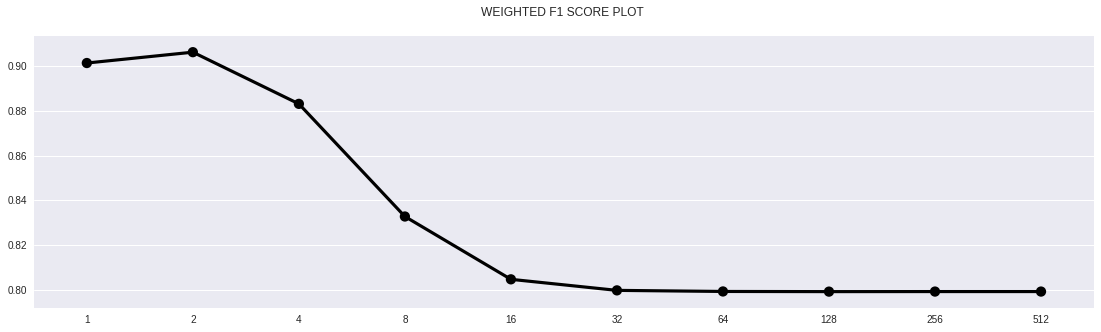

In [73]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_f1.keys()),y=list(cv_f1.values()),color ='black').set_title("WEIGHTED F1 SCORE PLOT \n ")

In [55]:
max(cv_f1.items(), key=operator.itemgetter(1))

(2, 0.9060875251711609)

** MAXIMUM F1 SCORE AT ALPHA  = 2.0 ** 

______

** RECALL OF NEGATIVE REVIEWS ** 

Text(0.5,1,'RECALL OF NEGATIVE REVIEWS\n ')

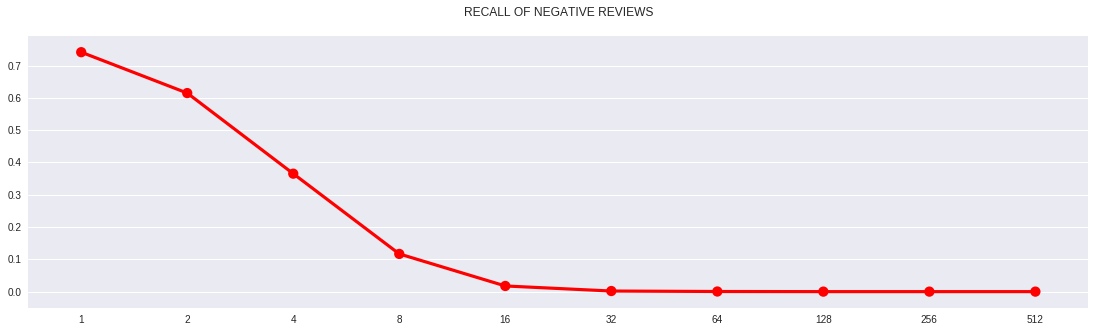

In [74]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_Nr.keys()),y=list(cv_Nr.values()),color ='red').set_title("RECALL OF NEGATIVE REVIEWS\n ")

In [57]:
max(cv_Nr.items(), key=operator.itemgetter(1))

(1, 0.7413352790952207)

 ** MAXIMUM RECALL FOR NEGATIVE REVIEWS OCCURS AT ALPHA = 1.0 **

-----
 ** F1 SCORE OF NEGATIVE REVIEWS **

Text(0.5,1,'F1 SCORE OF NEGATIVE REVIEWS\n ')

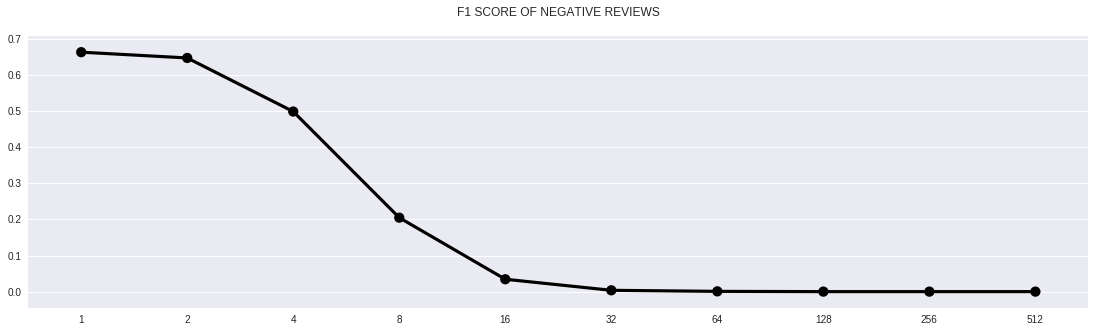

In [64]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_Nf1.keys()),y=list(cv_Nf1.values()),color ='black').set_title("F1 SCORE OF NEGATIVE REVIEWS\n ")

In [59]:
max(cv_Nf1.items(), key=operator.itemgetter(1))

(1, 0.6631853785900783)

** MAXIMUM F1 SCORE OF NEGATIVE REVIEWS OCCUR AT ALPHA = 1.0 ** 

 ** SUMMARY**


 
 ------
 
| ALPHA | ACCURACY   | RECALL : NEGATIVE REVIEWS |
|------|------|-----|
|   1.0  | 89.68 | 74.133|
|   2.0  | 90.81| 61.473|

-------

** Observations ** 
1.  When Alpha is 1.0 the recall of the negative reviews is highest with a value of 74.133 in comparison with the recall when Alpha  =2.0 where the value is 61.473. It is a huge drop. 
2.  The accuracy is high when Alpha is 2 but not a huge difference.
3. Given the fact these are the results coming out of cross-validation we need to check with the test data in order to look at the values of train and test error to examine over-fitting and under-fitting phenomenon.



** APLHA  = 1.0 ** 

In [78]:
mnb = MultinomialNB(alpha = 1.0, fit_prior=False,class_prior = [0.5,0.5])
mnb.fit(bow_train,y_train)
pred = mnb.predict(bow_test)
t_pred = mnb.predict(bow_train)
print("Test accuracy " + str(accuracy_score(y_test,pred)*100))
print("\n")
print("Test_error : " + str((1-accuracy_score(y_test,pred))*100))
print("\n")
print("Train error : " + str((1-accuracy_score(y_train,t_pred))*100))
print("\n")
print(classification_report(pred,y_test))

Test accuracy 89.09


Test_error : 10.909999999999997


Train error : 9.29


             precision    recall  f1-score   support

          0       0.73      0.57      0.64      3410
          1       0.92      0.96      0.94     16590

avg / total       0.88      0.89      0.89     20000



In [79]:
mnb = MultinomialNB(alpha = 2, fit_prior=False,class_prior = [0.5,0.5])
mnb.fit(bow_train,y_train)
pred = mnb.predict(bow_test)
t_pred = mnb.predict(bow_train)
print("Test accuracy " + str(accuracy_score(y_test,pred)*100))
print("\n")
print("Test_error : " + str((1-accuracy_score(y_test,pred))*100))
print("\n")
print("Train error : " + str((1-accuracy_score(y_train,t_pred))*100))
print("\n")
print(classification_report(pred,y_test))

Test accuracy 90.235


Test_error : 9.765


Train error : 8.076666666666664


             precision    recall  f1-score   support

          0       0.60      0.64      0.62      2503
          1       0.95      0.94      0.94     17497

avg / total       0.91      0.90      0.90     20000



------

** OBSERVATIONS **

| ALPHA | ACCURACY   | RECALL : NEGATIVE REVIEWS |TRAIN ERROR | TEST ERROR | DIFFERENCE|
|------|------|-----|-----|----|----|
|   1.0 | 89.1 | 57 |9.29|10.909|1.61|
|   2.0 | 90.235 | 64 |8.07|9.765|1.765|

------
** ALPHA = 2.0 ** has the upper edge over 1.0 with a 7% increase in the test recall and and 1% increase in the overall accuracy even though both are not overfitting  very much   <br>

**CONFUSION MATRIX**

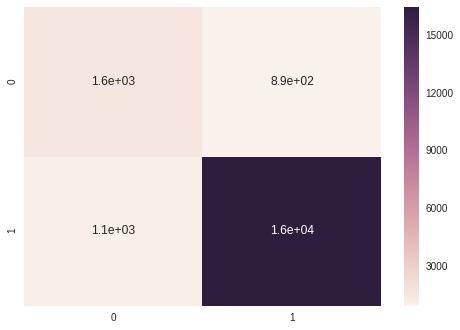

In [94]:
mnb = MultinomialNB(alpha = 2.0, fit_prior=False,class_prior = [0.5,0.5])
mnb.fit(bow_train,y_train)
pred = mnb.predict(bow_test)
sns.heatmap(confusion_matrix(pred,y_test),annot=True)

### FEATURE IMPORTANCE

In [0]:
features = bow.get_feature_names()

** NEGATIVE REVIEWS**

In [0]:
#getting top 100 words which have more likelihood given the class is negative reviews or 0
N_r_features = dict(zip(features,mnb.feature_log_prob_[0]))

nt_100 = sorted(N_r_features.items(), key=operator.itemgetter(1),reverse= True)[:100]
n_100 = {}

for i in nt_100:
  n_100[i[0]] = i[1]

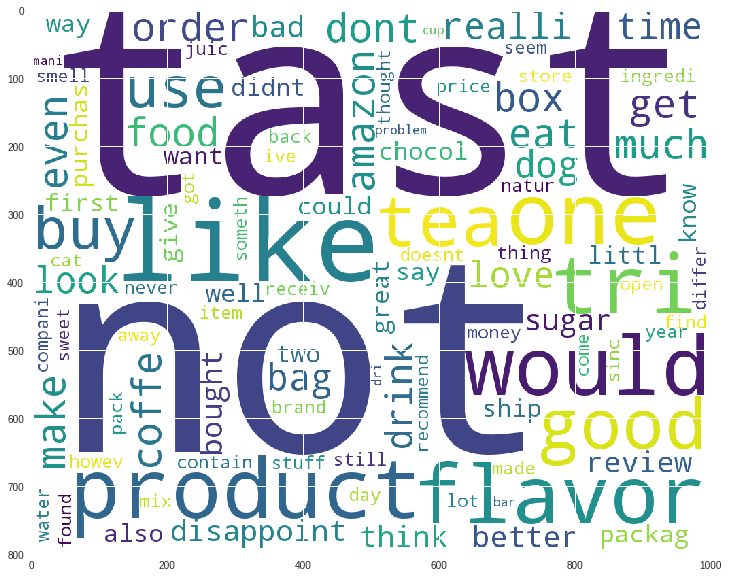

In [106]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud.WordCloud(background_color='white',width = 1000,height= 800).generate_from_frequencies(n_100))

** POSITIVE REVIEWS **

In [0]:
#getting top 100 words which have more likelihood given the class is negative reviews or 1
P_r_features = dict(zip(features,mnb.feature_log_prob_[1]))

pt_100 = sorted(P_r_features.items(), key=operator.itemgetter(1),reverse= True)[:100]
p_100 = {}

for i in pt_100:
  p_100[i[0]] = i[1]

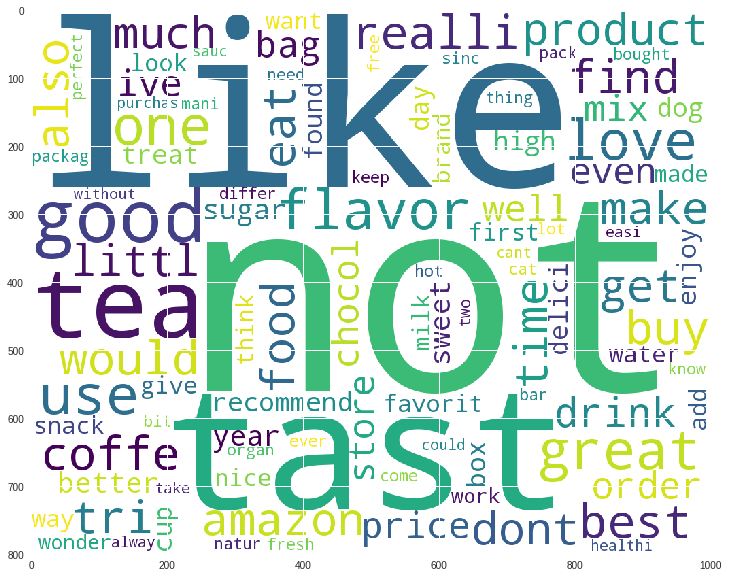

In [105]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud.WordCloud(background_color='white',width = 1000,height= 800).generate_from_frequencies(p_100))

<br>

## FEATURIZATION 2 : TF IDF 

### Loading the data

In [0]:
tf_idf_train = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/train_tfidf.sav','rb'))
tf_idf_test = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/test_tfidf.sav','rb'))
tf_idf_cv = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/cv_tfidf.sav','rb'))
tf_idf = pickle.load(open('/content/gdrive/My Drive/AppliedAI/Amazon Fine Food Reviews/tfidf.sav','rb'))

** DEFINING ALPHA RANGES ** 

In [0]:
#getting the alpha in the powers of 2 
range_alpha = np.arange(0,10)
p_2 = []
for i in range_alpha:
  p_2.append(2**i)
  
range_alpha = np.array(p_2)

In [0]:
#creating dictionaries to score the corresponding values of the metrics
cv_a = {}
cv_r = {}
cv_f1 = {}
cv_Nr = {}
cv_Nf1= {}
cv_Np = {}

### RUNNING THE LOOP

In [112]:
for i in range_alpha:
  mnb = MultinomialNB(alpha = i,fit_prior = False,class_prior = [0.5,0.5])
  mnb.fit(tf_idf_train,y_train)
  print("Running for Alpha : " + str(i) + "\n")
  c_pred = mnb.predict(tf_idf_cv)
  cv_a[i] = accuracy_score(y_cv,c_pred)
  cv_r[i] = recall_score(y_cv,c_pred,average='weighted')
  cv_f1[i] = f1_score(y_cv,c_pred,average = 'weighted')
  cv_Nr[i] =recall_score(y_cv,c_pred,average='binary',pos_label=0) #getting the recall of the negative reviews label 
  cv_Nf1[i]=f1_score(y_cv,c_pred,average = 'binary',pos_label = 0) #getting the F1_score of the negative reviews label
  cv_Np[i]=precision_score(y_cv,c_pred,average = 'binary',pos_label = 0)#getting the precision of the negative reviews label

Running for Alpha : 1

Running for Alpha : 2

Running for Alpha : 4

Running for Alpha : 8

Running for Alpha : 16

Running for Alpha : 32

Running for Alpha : 64

Running for Alpha : 128

Running for Alpha : 256

Running for Alpha : 512



** ACCURACY PLOT ** 

Text(0.5,1,'ACCURACY \n ')

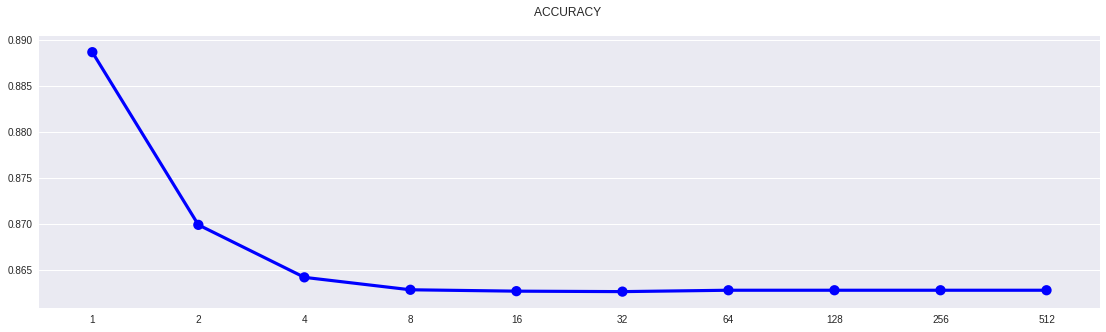

In [113]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_a.keys()),y=list(cv_a.values()),color ='blue').set_title("ACCURACY \n ")

In [114]:
max(cv_a.items(), key=operator.itemgetter(1))

(1, 0.8887)

 ** MAXIMUM ACCURACY IS AT ALPHA = 1.0 ** 

----
** WEIGHTED F1 SCORE  PLOT** 

Text(0.5,1,'WEIGHTED F1 SCORE PLOT \n ')

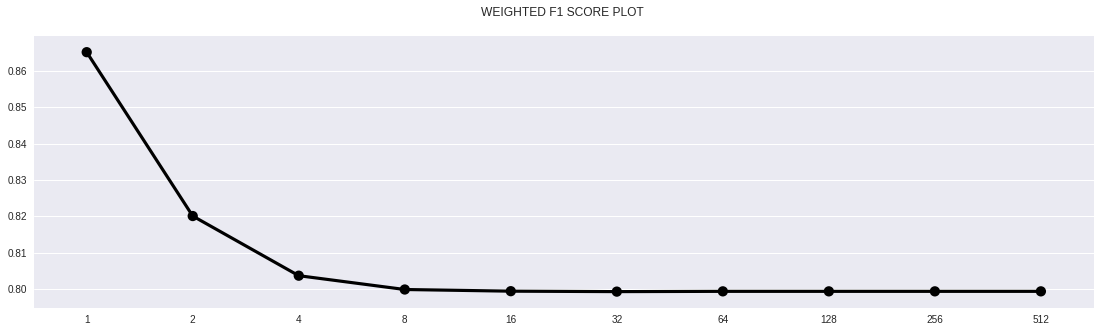

In [115]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_f1.keys()),y=list(cv_f1.values()),color ='black').set_title("WEIGHTED F1 SCORE PLOT \n ")

In [116]:
max(cv_f1.items(), key=operator.itemgetter(1))

(1, 0.8650849336008439)

** Maximum weighted F1 Score is at Alpha = 1. **

______

** RECALL OF NEGATIVE REVIEWS ** 

Text(0.5,1,'RECALL OF NEGATIVE REVIEWS\n ')

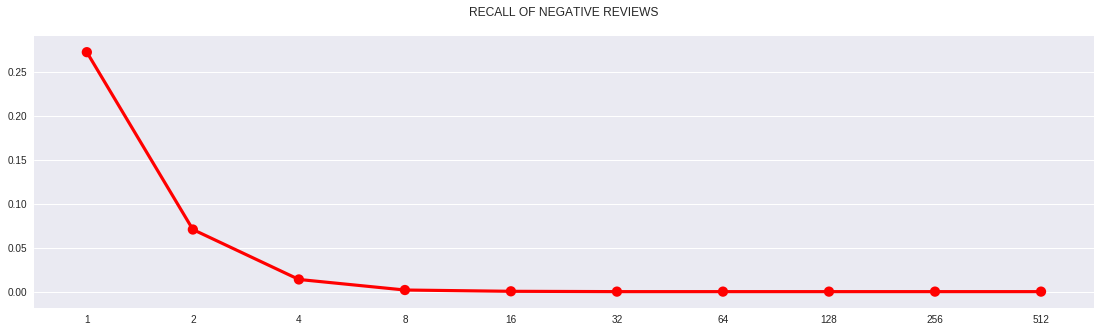

In [117]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_Nr.keys()),y=list(cv_Nr.values()),color ='red').set_title("RECALL OF NEGATIVE REVIEWS\n ")

 ** MAXIMUM RECALL FOR NEGATIVE REVIEWS OCCURS AT ALPHA = 1.0 **

Text(0.5,1,'F1 SCORE OF NEGATIVE REVIEWS\n ')

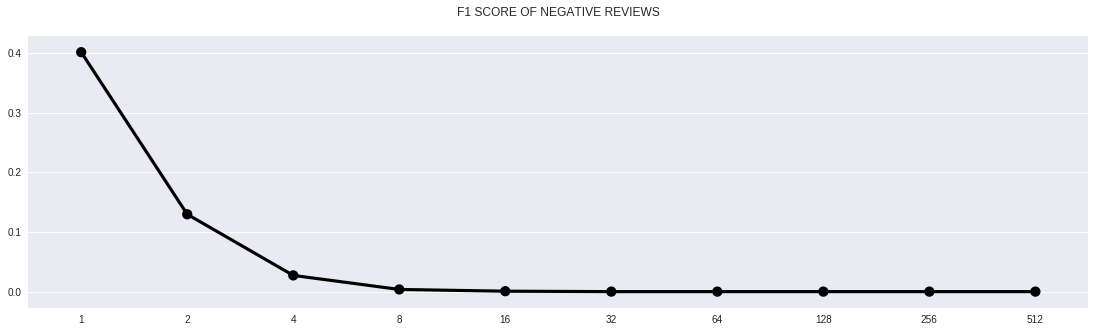

In [119]:
plt.figure(figsize = (19,5))
sns.pointplot(x = list(cv_Nf1.keys()),y=list(cv_Nf1.values()),color ='black').set_title("F1 SCORE OF NEGATIVE REVIEWS\n ")

 ** MAXIMUM F1 SCORE FOR NEGATIVE REVIEWS OCCURS AT ALPHA = 1.0 **

----------

** OBSERVATIONS ** 

1. In the TF-IDF representation at alpha = 1.0 there is reasonable recall for the negative reviews. All the observed metrics continue to drop down as the  value of alpha increases. 
3. TF IDF method of information retrieval does not give enough information for calculation of the the likelihoods for Naive Bayes algorithm.
4. Bag of words is a better reprsentation than TF_IDF when the machine learning model is Naive Bayes.


** ALPHA = 1.0 ** 

In [122]:
mnb = MultinomialNB(alpha = 1.0, fit_prior=False,class_prior = [0.5,0.5])
mnb.fit(tf_idf_train,y_train)
pred = mnb.predict(tf_idf_test)
t_pred = mnb.predict(tf_idf_train)
print("Test accuracy " + str(accuracy_score(y_test,pred)*100))
print("\n")
print("Test_error : " + str((1-accuracy_score(y_test,pred))*100))
print("\n")
print("Train error : " + str((1-accuracy_score(y_train,t_pred))*100))
print("\n")
print(classification_report(pred,y_test))

Test accuracy 88.605


Test_error : 11.395


Train error : 8.943333333333337


             precision    recall  f1-score   support

          0       0.24      0.72      0.36       897
          1       0.99      0.89      0.94     19103

avg / total       0.95      0.89      0.91     20000



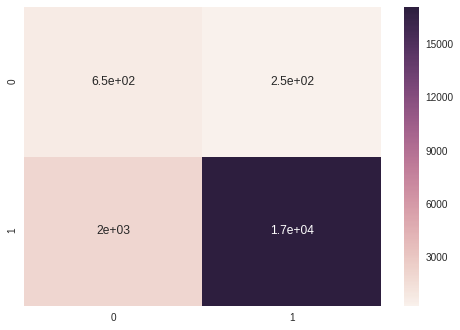

In [125]:
mnb = MultinomialNB(alpha = 1.0, fit_prior=False,class_prior = [0.5,0.5])
mnb.fit(tf_idf_train,y_train)
pred = mnb.predict(tf_idf_test)
sns.heatmap(confusion_matrix(pred,y_test),annot=True)

-----

### FEATURE IMPORTANCE 

In [0]:
features = tf_idf.get_feature_names()

** NEGATIVE REVIEWS ** 

In [0]:
#getting top 100 words which have more likelihood given the class is negative reviews or 0
N_r_features = dict(zip(features,mnb.feature_log_prob_[0]))

nt_100 = sorted(N_r_features.items(), key=operator.itemgetter(1),reverse= True)[:100]
n_100 = {}

for i in nt_50:
  n_100[i[0]] = i[1]

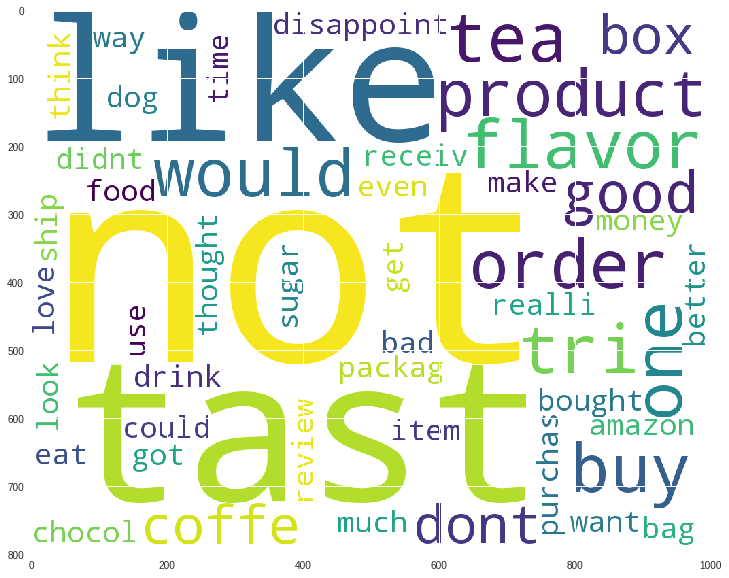

In [129]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud.WordCloud(background_color='white',width = 1000,height= 800).generate_from_frequencies(n_100))

** POSITIVE REVIEWS ** 

In [0]:
#getting top 100 words which have more likelihood given the class is negative reviews or 0
P_r_features = dict(zip(features,mnb.feature_log_prob_[1]))

pt_100 = sorted(P_r_features.items(), key=operator.itemgetter(1),reverse= True)[:100]
p_100 = {}

for i in pt_100:
  p_100[i[0]] = i[1]

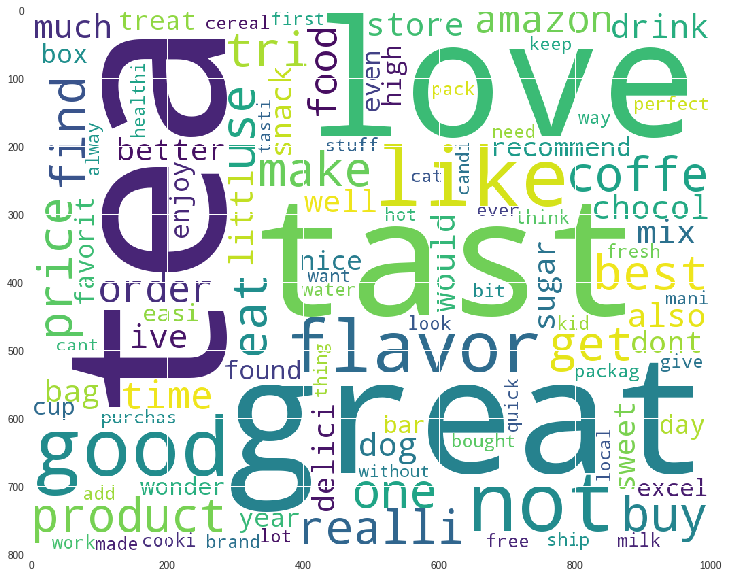

In [131]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud.WordCloud(background_color='white',width = 1000,height= 800).generate_from_frequencies(p_100))

<br>


<br>


-------
## SUMMARY


|Featurization|Model|Hyper-Parameter| Train Error | Test Error|
|---|---|---|---|
| Bag of Words| Naive Bayes| Alpha = 2.0| 8.07 | 9.65|
| TF IDF| Naive Bayes| Alpha = 1.0 | 8.94 | 11.39|



